In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# Display plots inline and change default figure size
%matplotlib inline

IMPLEMENTATION OF FEED FORWARD NEURAL NETWORK WITH BACK PROPOGATION

In [2]:
#Implementation of Feedforward path
#Implementation with one hidden layer and 3 nodes in hidden layer

import math

#Helper function for sigmoid
#Activiation function chosen is sigmoid (1/1+e^-z)
def sigmoid(x):
 s = np.zeros((1, len(x[0])))
 for i in range (0, len(x[0])):
   s[0,i]= 1 / (1 + math.exp(-x[0,i]))
 return s

#Helper Function to calculate the hard threshold for output layer
def hard_threshold(x):
  ot =0
  if(x<0.5):
      ot=0
  else:
      ot=1
  return ot


# Helper function for Feed forward. 
#Input - W1 - Wieghts vector to the hidden layer
#Input - W2 - Wieghts vector  to the output layer
#Input - b1 - bias vector to the hidden layer
#Input - b2 - bias vector to the output layer
#Input - x - Input vector 
#Output - a3 - 0 or 1 from output layer
def feedforward(W1, W2, b1, b2 , Xvec):
    out = np.zeros((len(Xvec), 1))
    # Feed Forward propagation
    for i in range (0, len(Xvec)):
        z1 = Xvec[i].dot(W1) + b1
        a2 = sigmoid(z1)
        z2 = a2.dot(W2) + b2
        a3 = sigmoid(z2)
        #Applying hard threshold
        out[i] = hard_threshold(a3)
        
    return out

In [3]:
#Algorithm Implementation of feed forward with backpropogation to adjust the weights and bias units

import matplotlib.pyplot as plt

#Model to train and test
def train_test_model(trainSet,testSet,trainSetout,testSetout):
    # Initialize the Weights and bias vectors .
    np.random.seed(100)
    #Taking small Random values for weights
    #Number of nodes in hidden layer is chosen as 3. 
    print ("Setting Intial values for Weights to small random value") 
    W1 = np.random.random((2, 3))/1000 
    W2 = np.random.random((3, 1))/1000
    print ("W1 = ",W1) 
    print ("W2 = ",W2) 
    print ("\n") 
    #Initializing bias as zeros
    b1 = np.zeros((1, 3))
    b2 = np.zeros((1, 1))
    ErrorData = np.zeros((320, 1))
   
    #Training the trainset data (80% of data)
    print ("Starting to train the model with the Training set (80% data)") 
    #Iterating over the trainsSet length 
    for k in range (0, len(trainSet)):
        #Number of iterations per epoch is set as 1500 
        for i in range (0, 1500):

            ##Perform a Feed Forward pass
            z1 = trainSet[k].dot(W1) + b1
            a2 = sigmoid(z1)
            z2 = a2.dot(W2) + b2
            a3 = sigmoid(z2)
           
            #Taking alpha value as 0.01
            alpha = 0.01

            ##Back Propagation pass
            #Output layer weight adjustment
            f_z3 = a3*(1-a3)
            Err3 = y[k]-a3
            delta3 = f_z3*Err3
            for i in range (0, len(W2)):
               W2[i,0]= W2[i,0] +alpha*a2[0,i]*delta3

            #Output layer Bias adjustment
            b2 = b2 + alpha*delta3

            #hidden layer weight adjustment
            f_z2 = a2*(1-a2)
            delta1_2 = f_z2[0,0] * W2[0,0] * delta3
            delta2_2 = f_z2[0,1] * W2[1,0] * delta3
            delta3_2 = f_z2[0,2] * W2[2,0] * delta3

            W1[0,0] = W1[0,0] +alpha*trainSet[k,0]*delta1_2
            W1[0,1] = W1[0,1] +alpha*trainSet[k,0]*delta2_2
            W1[0,2] = W1[0,2] +alpha*trainSet[k,0]*delta3_2
            W1[1,0] = W1[1,0] +alpha*trainSet[k,1]*delta1_2
            W1[1,1] = W1[1,1] +alpha*trainSet[k,1]*delta2_2
            W1[1,2] = W1[1,2] +alpha*trainSet[k,1]*delta3_2

            #hidden layer bias adjustment
            b1[0,0] = b1[0,0]+alpha*delta1_2
            b1[0,1] = b1[0,1]+alpha*delta2_2
            b1[0,2] = b1[0,2]+alpha*delta3_2    
        #Analyzing errors    
        ErrorVec = feedforward(W1, W2, b1, b2 , trainSet) - np.reshape(trainSetout, (320,1))
        ErrorData[k] = np.count_nonzero(ErrorVec)        
    print ("Training completed") 
    plt.plot(ErrorData)
    plt.xlabel('Number of epochs')
    plt.ylabel('Total error on training set')
    plt.title('Error Graph for Training set')
    print ("Weights and bias after training") 
    print ("W1 = ",W1) 
    print ("W2 = ",W2) 
    print ("b1 = ",b1) 
    print ("b2 = ",b2) 
    
    print ("\n") 
    print ("Testing the model with the Test set (20% data)") 
    
    #Testing the model with 20% of data. 
    numErrors = np.count_nonzero(feedforward(W1, W2, b1, b2 , testSet) - np.reshape(testSetout, (80,1)))
    print ("Total number of errors for Testing set = ", numErrors) 
    


LOADING INPUT DATA FROM MOONS DATASET

In [4]:
# Using Load data code from LoadDataset.ipynb provided
#Assignment 1 - Part 2 - Loading the input moons dataset 

#Use pandas to read the CSV file as a dataframe
df = pd.read_csv("C:\Assignments\moons400.csv")

# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']    # drop the 'Class' column from the dataframe
X = df.as_matrix() # convert the remaining columns to a numpy array


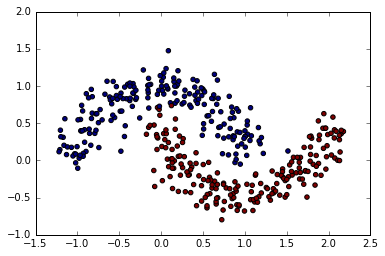

In [5]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)

GENERATING TRAIN AND TEST SET DATA

In [6]:
trainSet = X[0:320,:]
testSet =  X[320:400,:]
trainSetout = y[0:320]
testSetout = y[320:400]

CONSTRUCTING THE MODEL (TRAINING AND TESTING)

Setting Intial values for Weights to small random value
W1 =  [[  5.43404942e-04   2.78369385e-04   4.24517591e-04]
 [  8.44776132e-04   4.71885619e-06   1.21569121e-04]]
W2 =  [[ 0.00067075]
 [ 0.00082585]
 [ 0.00013671]]


Starting to train the model with the Training set (80% data)
Training completed
Weights and bias after training
W1 =  [[ 1.06120632  1.06174273  1.0601623 ]
 [-3.9671555  -3.97891416 -3.94678534]]
W2 =  [[ 3.91948214]
 [ 3.9334059 ]
 [ 3.89496121]]
b1 =  [[ 0.06194001  0.06399768  0.05849626]]
b2 =  [[-4.61459467]]


Testing the model with the Test set (20% data)
Total number of errors for Testing set =  11


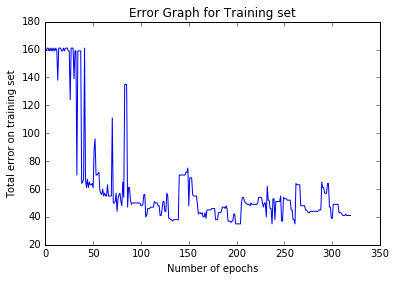

In [7]:
#Constructing model
train_test_model(trainSet,testSet,trainSetout,testSetout)
